NBA

In [ ]:
import requests
import pandas as pd
import certifi
import ssl
import sqlite3
import time
import matplotlib.pyplot as plt

print(ssl.get_default_verify_paths())

# Constants
API_KEY = '8781b066fc9a11b5d2c6eb6a16d7af43'  # Replace with your Odds API key
SPORT = 'basketball_nba'  # NBA Basketball
REGION = 'us'  # Region for odds (e.g., 'us', 'uk', 'eu')
MARKETS = 'h2h,spreads,totals'  # Market types for both pre-game and live odds
DB_NAME = 'odds.db'

# URLs to fetch odds data
PRE_EVENT_URL = f'https://api.the-odds-api.com/v4/sports/{SPORT}/odds?apiKey={API_KEY}&regions={REGION}&markets={MARKETS}&oddsFormat=decimal'
LIVE_URL = f'https://api.the-odds-api.com/v4/sports/{SPORT}/odds?apiKey={API_KEY}&regions={REGION}&markets={MARKETS}&oddsFormat=decimal&eventStatus=live'

def create_database():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS odds (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            event_id TEXT,
            home_team TEXT,
            away_team TEXT,
            start_time TEXT,
            bookmaker TEXT,
            market TEXT,
            outcome TEXT,
            price REAL,
            point REAL,
            timestamp TEXT,
            odds_type TEXT  -- Pre-event or Live odds
        )
    ''')
    conn.commit()
    conn.close()

def fetch_and_store_odds(url, odds_type):
    try:
        response = requests.get(url, verify=certifi.where())
        response.raise_for_status()
        data = response.json()

        if not data:
            print(f"No {odds_type} data returned from API.")
            return

        rows = []
        for event in data:
            event_id = event.get('id', 'N/A')
            home_team = event.get('home_team', 'N/A')
            away_team = event.get('away_team', 'N/A')
            commence_time = event.get('commence_time', 'N/A')
            timestamp = pd.Timestamp.now().isoformat()

            for bookmaker in event.get('bookmakers', []):
                bookmaker_name = bookmaker.get('title', 'N/A')
                for market in bookmaker.get('markets', []):
                    market_key = market.get('key', 'N/A')
                    for outcome in market.get('outcomes', []):
                        rows.append((
                            event_id, home_team, away_team, commence_time, bookmaker_name,
                            market_key, outcome.get('name', 'N/A'), outcome.get('price', 'N/A'),
                            outcome.get('point', 'N/A'), timestamp, odds_type
                        ))

        if rows:
            conn = sqlite3.connect(DB_NAME)
            cursor = conn.cursor()
            cursor.executemany('''
                INSERT INTO odds (event_id, home_team, away_team, start_time, bookmaker, market, outcome, price, point, timestamp, odds_type)
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', rows)
            conn.commit()
            conn.close()
            print(f"{odds_type} odds data successfully stored.")

    except requests.exceptions.RequestException as req_err:
        print(f"Error fetching {odds_type} data: {req_err}")

# Initialize database
create_database()

# Run fetching every 30 minutes
while True:
    fetch_and_store_odds(PRE_EVENT_URL, "Pre-event")
    fetch_and_store_odds(LIVE_URL, "Live")
    time.sleep(1800)  # Sleep for 30 minutes


DefaultVerifyPaths(cafile='C:\\ProgramData\\anaconda3\\Library\\ssl\\cacert.pem', capath=None, openssl_cafile_env='SSL_CERT_FILE', openssl_cafile='C:\\Program Files\\Common Files\\ssl/cert.pem', openssl_capath_env='SSL_CERT_DIR', openssl_capath='C:\\Program Files\\Common Files\\ssl/certs')
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds data successfully stored.
Live odds data successfully stored.
Pre-event odds d

EPL

In [ ]:
import requests
import pandas as pd
import certifi
import ssl
import sqlite3
import time

print(ssl.get_default_verify_paths())

# Constants
API_KEY = '8781b066fc9a11b5d2c6eb6a16d7af43'  # Replace with your Odds API key
SPORT = 'soccer_epl'  # Example: 'soccer_epl' for English Premier League
REGION = 'us'  # Region for odds (e.g., 'us', 'uk', 'eu')
MARKET = 'h2h'  # Market type (e.g., 'h2h' for moneyline, 'spreads', 'totals')
DB_NAME = 'odds_data.db'

# URL to fetch odds data
URL = f'https://api.the-odds-api.com/v4/sports/{SPORT}/odds?apiKey={API_KEY}&regions={REGION}&markets={MARKET}'

def create_database():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS odds (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            event_id TEXT,
            home_team TEXT,
            away_team TEXT,
            start_time TEXT,
            bookmaker TEXT,
            market TEXT,
            outcome TEXT,
            price REAL,
            point REAL,
            timestamp TEXT
        )
    ''')
    conn.commit()
    conn.close()

def fetch_and_store_odds():
    try:
        response = requests.get(URL, verify=certifi.where())
        response.raise_for_status()
        data = response.json()

        if not data:
            print("No data returned from API.")
            return

        rows = []
        for event in data:
            event_id = event.get('id', 'N/A')
            home_team = event.get('home_team', 'N/A')
            away_team = event.get('away_team', 'N/A')
            commence_time = event.get('commence_time', 'N/A')
            timestamp = pd.Timestamp.now().isoformat()
            
            for bookmaker in event.get('bookmakers', []):
                bookmaker_name = bookmaker.get('title', 'N/A')
                for market in bookmaker.get('markets', []):
                    market_key = market.get('key', 'N/A')
                    for outcome in market.get('outcomes', []):
                        rows.append((
                            event_id, home_team, away_team, commence_time, bookmaker_name,
                            market_key, outcome.get('name', 'N/A'), outcome.get('price', 'N/A'),
                            outcome.get('point', 'N/A'), timestamp
                        ))

        if rows:
            conn = sqlite3.connect(DB_NAME)
            cursor = conn.cursor()
            cursor.executemany('''
                INSERT INTO odds (event_id, home_team, away_team, start_time, bookmaker, market, outcome, price, point, timestamp)
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', rows)
            conn.commit()
            conn.close()
            print("Odds data successfully stored.")
    
    except requests.exceptions.RequestException as req_err:
        print(f"Error fetching data: {req_err}")

# Initialize database
create_database()

# Run fetching every 30 minutes
while True:
    fetch_and_store_odds()
    time.sleep(3600)  # Sleep for 60 minutes


DefaultVerifyPaths(cafile='C:\\ProgramData\\anaconda3\\Library\\ssl\\cacert.pem', capath=None, openssl_cafile_env='SSL_CERT_FILE', openssl_cafile='C:\\Program Files\\Common Files\\ssl/cert.pem', openssl_capath_env='SSL_CERT_DIR', openssl_capath='C:\\Program Files\\Common Files\\ssl/certs')
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.


NCAA Men's BBAll

In [ ]:
import requests
import pandas as pd
import certifi
import ssl
import sqlite3
import time
import matplotlib.pyplot as plt

print(ssl.get_default_verify_paths())

# Constants
API_KEY = '8781b066fc9a11b5d2c6eb6a16d7af43'  # Replace with your Odds API key
SPORT = 'basketball_ncaab'  # NCAA College Men's Basketball
REGION = 'us'  # Region for odds (e.g., 'us', 'uk', 'eu')
MARKET = 'h2h'  # Market type (e.g., 'h2h' for moneyline, 'spreads', 'totals')
DB_NAME = 'odds_data.db'

# URL to fetch odds data
URL = f'https://api.the-odds-api.com/v4/sports/{SPORT}/odds?apiKey={API_KEY}&regions={REGION}&markets={MARKET}'

def create_database():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS odds (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            event_id TEXT,
            home_team TEXT,
            away_team TEXT,
            start_time TEXT,
            bookmaker TEXT,
            market TEXT,
            outcome TEXT,
            price REAL,
            point REAL,
            timestamp TEXT
        )
    ''')
    conn.commit()
    conn.close()

def fetch_and_store_odds():
    try:
        response = requests.get(URL, verify=certifi.where())
        response.raise_for_status()
        data = response.json()

        if not data:
            print("No data returned from API.")
            return

        rows = []
        for event in data:
            event_id = event.get('id', 'N/A')
            home_team = event.get('home_team', 'N/A')
            away_team = event.get('away_team', 'N/A')
            commence_time = event.get('commence_time', 'N/A')
            timestamp = pd.Timestamp.now().isoformat()
            
            for bookmaker in event.get('bookmakers', []):
                bookmaker_name = bookmaker.get('title', 'N/A')
                for market in bookmaker.get('markets', []):
                    market_key = market.get('key', 'N/A')
                    for outcome in market.get('outcomes', []):
                        rows.append((
                            event_id, home_team, away_team, commence_time, bookmaker_name,
                            market_key, outcome.get('name', 'N/A'), outcome.get('price', 'N/A'),
                            outcome.get('point', 'N/A'), timestamp
                        ))

        if rows:
            conn = sqlite3.connect(DB_NAME)
            cursor = conn.cursor()
            cursor.executemany('''
                INSERT INTO odds (event_id, home_team, away_team, start_time, bookmaker, market, outcome, price, point, timestamp)
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', rows)
            conn.commit()
            conn.close()
            print("Odds data successfully stored.")
    
    except requests.exceptions.RequestException as req_err:
        print(f"Error fetching data: {req_err}")

def plot_odds(event_id):
    conn = sqlite3.connect(DB_NAME)
    query = """
        SELECT home_team, away_team, timestamp, outcome, price, bookmaker 
        FROM odds 
        WHERE event_id = ?
        ORDER BY timestamp
    """
    df = pd.read_sql_query(query, conn, params=(event_id,))
    conn.close()
    
    if df.empty:
        print("No data found for the selected match.")
        return
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    home_team = df['home_team'].iloc[0]
    away_team = df['away_team'].iloc[0]
    
    plt.figure(figsize=(12, 6))
    for bookmaker in df['bookmaker'].unique():
        subset = df[(df['outcome'] == home_team) & (df['bookmaker'] == bookmaker)]
        plt.plot(subset['timestamp'], subset['price'], marker='o', label=f"{bookmaker} (Home)")
    
    plt.xlabel('Time')
    plt.ylabel('Odds')
    plt.title(f"Home Team Odds Over Time: {home_team} vs {away_team}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    for bookmaker in df['bookmaker'].unique():
        subset = df[(df['outcome'] == away_team) & (df['bookmaker'] == bookmaker)]
        plt.plot(subset['timestamp'], subset['price'], marker='o', label=f"{bookmaker} (Away)")
    
    plt.xlabel('Time')
    plt.ylabel('Odds')
    plt.title(f"Away Team Odds Over Time: {home_team} vs {away_team}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Initialize database
create_database()

# Run fetching every 30 minutes
while True:
    fetch_and_store_odds()
    time.sleep(1800)  # Sleep for 30 minutes


DefaultVerifyPaths(cafile='C:\\ProgramData\\anaconda3\\Library\\ssl\\cacert.pem', capath=None, openssl_cafile_env='SSL_CERT_FILE', openssl_cafile='C:\\Program Files\\Common Files\\ssl/cert.pem', openssl_capath_env='SSL_CERT_DIR', openssl_capath='C:\\Program Files\\Common Files\\ssl/certs')
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stored.
Odds data successfully stor

Update Timestamp to UTC ISO Codes

In [3]:
import sqlite3
import pandas as pd
from datetime import datetime
import pytz

# Connect to the database
db_path = "odds.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Load data into a DataFrame
table_name = "odds"  # Table storing the odds data
query = f"SELECT * FROM {table_name}"  # Load existing data
df = pd.read_sql_query(query, conn)

# Define local timezone
local_tz = pytz.timezone("America/New_York")  # Updated to Eastern Time (EST/EDT)

# Convert local timestamp to UTC ISO format
def convert_to_utc_iso(local_time):
    if isinstance(local_time, str):
        try:
            local_dt = datetime.fromisoformat(local_time)
            local_dt = local_tz.localize(local_dt) if local_dt.tzinfo is None else local_dt
        except ValueError:
            return None  # Handle incorrect format gracefully
    else:
        return None  # Skip invalid entries
    
    utc_dt = local_dt.astimezone(pytz.utc)
    return utc_dt.isoformat()

# Convert timestamp column to UTC
df["timestamp"] = df["timestamp"].astype(str).apply(convert_to_utc_iso)

# Save back to database
df.to_sql(table_name, conn, if_exists="replace", index=False)

# Close connection
conn.close()

print("Timestamp conversion to UTC completed and saved to database.")



Timestamp conversion to UTC completed and saved to database.


Plot Odds Changes Over Time

In [4]:
import requests
import pandas as pd
import certifi
import ssl
import sqlite3
import time
import matplotlib.pyplot as plt

# Constants
API_KEY = '8781b066fc9a11b5d2c6eb6a16d7af43'  # Replace with your Odds API key
REGION = 'us'  # Region for odds (e.g., 'us', 'uk', 'eu')
MARKET = 'h2h'  # Market type (e.g., 'h2h' for moneyline, 'spreads', 'totals')
DB_NAME = 'odds.db'


def plot_odds(event_id):
    conn = sqlite3.connect(DB_NAME)
    query = """
        SELECT home_team, away_team, start_time, outcome, price, bookmaker, timestamp
        FROM odds 
        WHERE event_id = ?
        ORDER BY timestamp
    """
    df = pd.read_sql_query(query, conn, params=(event_id,))
    conn.close()
    
    if df.empty:
        print("No data found for the selected match.")
        return
    df[['timestamp', 'price', 'outcome', 'bookmaker']].dropna().head(10)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['start_time'] = pd.to_datetime(df['start_time'])
    event_start_time = df['start_time'].iloc[0]
    
    home_team = df['home_team'].iloc[0]
    away_team = df['away_team'].iloc[0]
    
    plt.figure(figsize=(12, 6))
    for bookmaker in df['bookmaker'].unique():
        subset = df[(df['outcome'] == home_team) & (df['bookmaker'] == bookmaker)]
        plt.plot(subset['timestamp'], subset['price'], marker='o', label=f"{bookmaker} (Home)")
    
    plt.axvline(event_start_time, color='r', linestyle='--', label='Event Start Time')
    plt.xlabel('Time')
    plt.ylabel('Odds')
    plt.title(f"Home Team Odds Over Time: {home_team} vs {away_team}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    for bookmaker in df['bookmaker'].unique():
        subset = df[(df['outcome'] == away_team) & (df['bookmaker'] == bookmaker)]
        plt.plot(subset['timestamp'], subset['price'], marker='o', label=f"{bookmaker} (Away)")
    
    plt.axvline(event_start_time, color='r', linestyle='--', label='Event Start Time')
    plt.xlabel('Time')
    plt.ylabel('Odds')
    plt.title(f"Away Team Odds Over Time: {home_team} vs {away_team}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()




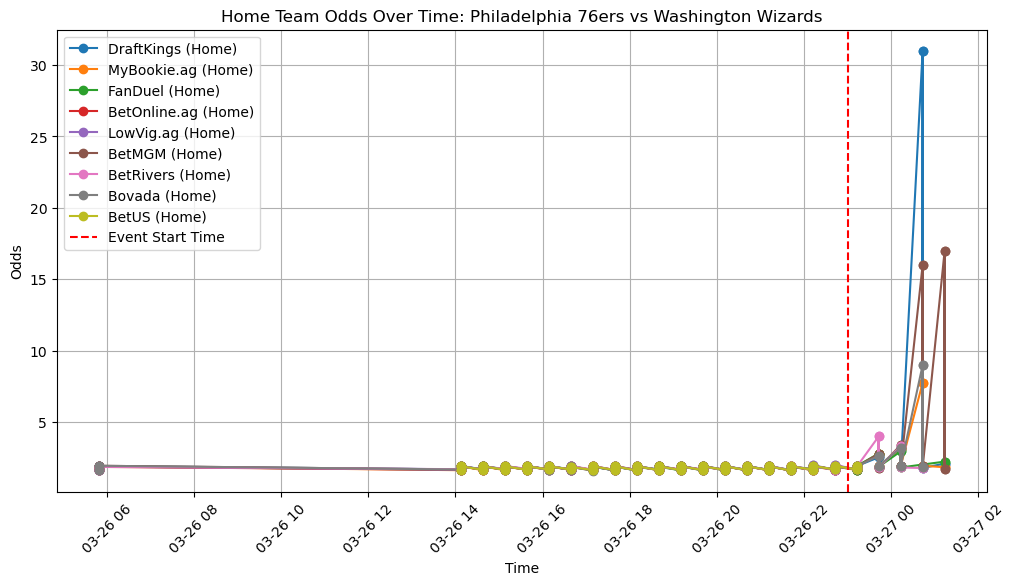

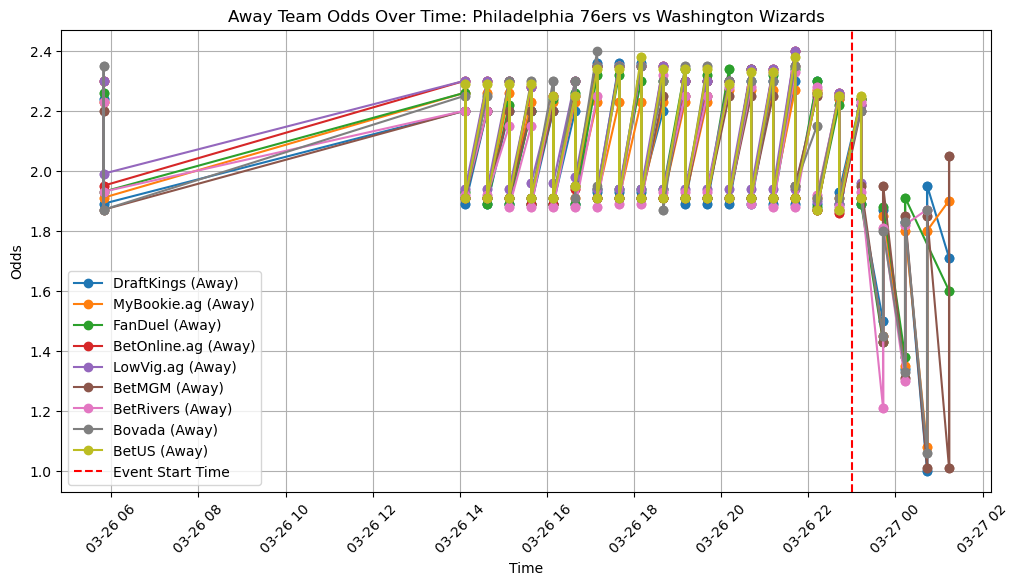

In [5]:


# Choose an event_id from the database
event_id = 'a9fe2fed5ee8f127bf88f8f4f62e766f'  

# Plot the odds for the selected match
plot_odds(event_id)
